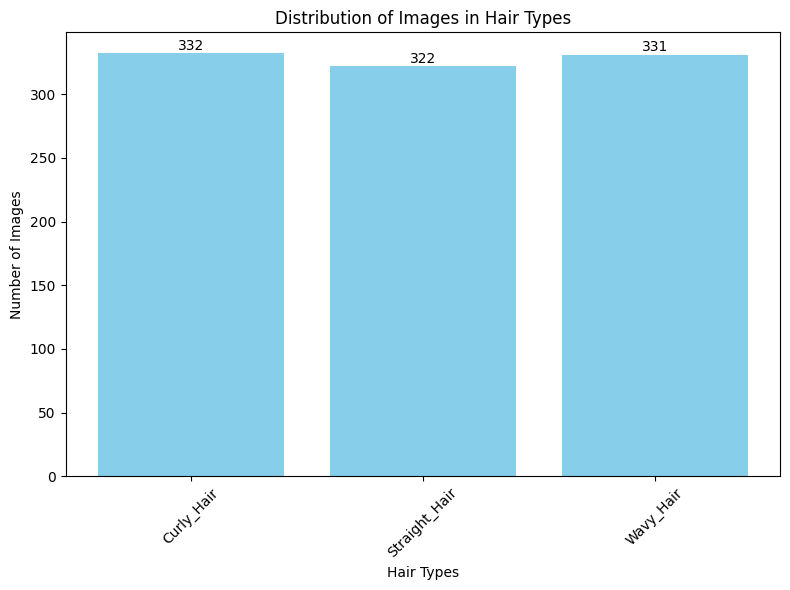

In [2]:
import os
import matplotlib.pyplot as plt

# Directory path where the images are stored
directory = "hair_types"
class_names = ["Curly_Hair", "Straight_Hair", "Wavy_Hair"]
image_count = []

# Count the number of images in each class
for class_name in class_names:
    folder_path = os.path.join(directory, class_name)
    num_images = len(os.listdir(folder_path))
    image_count.append(num_images)

# Plotting the distribution with counts on bars
plt.figure(figsize=(8, 6))
bars = plt.bar(class_names, image_count, color="skyblue")

# Displaying counts on top of the bars
for bar, count in zip(bars, image_count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        str(count),
        ha="center",
        va="bottom",
    )

plt.title("Distribution of Images in Hair Types")
plt.xlabel("Hair Types")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
from PIL import Image
import os
from collections import Counter

directory = "hair_types"
class_names = ["Curly_Hair", "Straight_Hair", "Wavy_Hair"]

total_images = 0
total_sizes = 0
image_formats = []
image_modes = []
dimensions = []

# Iterate through each class folder
for class_name in class_names:
    folder_path = os.path.join(directory, class_name)

    # Iterate through each image in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if file_path.endswith((".jpg", ".png")):
            try:
                img = Image.open(file_path)
                # Gather information about the image
                total_images += 1
                total_sizes += os.path.getsize(file_path)
                image_formats.append(img.format)
                image_modes.append(img.mode)
                dimensions.append((img.width, img.height))
            except Exception as e:
                print(f"Error opening {filename}: {e}")

# Calculate additional statistics
average_size = total_sizes / total_images if total_images > 0 else 0
unique_formats = set(image_formats)
unique_modes = set(image_modes)
min_dimensions = min(dimensions) if dimensions else (0, 0)
max_dimensions = max(dimensions) if dimensions else (0, 0)
aspect_ratios = [round(w / h, 2) for w, h in dimensions if h != 0]
most_common_dimensions = Counter(dimensions).most_common(3)

# Print the summary and additional statistics
print("Summary of Image Quality:")
print(f"Total Images: {total_images}")
print(f"Average Image Size: {average_size:.2f} bytes")
print(f"Unique Image Formats: {unique_formats}")
print(f"Unique Image Modes: {unique_modes}")
print(
    f"Minimum Image Dimensions: {min_dimensions[0]}x{min_dimensions[1]}"
    if min_dimensions != (0, 0)
    else "No images found"
)
print(
    f"Maximum Image Dimensions: {max_dimensions[0]}x{max_dimensions[1]}"
    if max_dimensions != (0, 0)
    else "No images found"
)
print(f"Aspect Ratios: {aspect_ratios}")
print(f"Most Common Dimensions: {most_common_dimensions}")

Summary of Image Quality:
Total Images: 898
Average Image Size: 73410.32 bytes
Unique Image Formats: {'JPEG', 'PNG'}
Unique Image Modes: {'P', 'RGB', 'RGBA'}
Minimum Image Dimensions: 24x24
Maximum Image Dimensions: 4622x2311
Aspect Ratios: [1.02, 0.89, 0.92, 1.0, 1.78, 1.78, 1.0, 0.83, 1.55, 1.01, 1.69, 1.0, 1.5, 0.89, 1.14, 1.52, 0.8, 1.0, 1.51, 0.8, 0.8, 1.78, 1.33, 0.56, 0.89, 0.8, 1.48, 1.5, 0.56, 0.85, 1.0, 0.8, 0.85, 1.0, 0.75, 1.33, 1.33, 1.5, 0.78, 0.73, 1.5, 1.0, 1.0, 1.0, 0.74, 1.0, 0.8, 1.0, 0.8, 1.0, 0.67, 1.01, 0.75, 1.02, 0.75, 0.75, 1.0, 1.0, 0.75, 1.01, 1.0, 1.36, 1.36, 1.5, 1.0, 1.0, 0.56, 1.0, 0.95, 1.0, 0.74, 1.55, 0.8, 1.02, 0.75, 0.84, 1.0, 1.0, 0.83, 0.8, 1.0, 0.97, 1.5, 2.0, 1.0, 1.67, 1.33, 1.02, 0.8, 1.8, 1.59, 1.78, 1.34, 1.0, 0.67, 1.5, 0.87, 0.67, 1.67, 0.81, 1.2, 1.0, 0.56, 0.73, 1.0, 0.8, 1.33, 1.78, 0.8, 0.74, 0.75, 0.89, 0.81, 1.0, 0.67, 1.5, 0.75, 1.0, 1.36, 1.33, 1.0, 0.75, 1.0, 1.5, 1.21, 1.12, 0.67, 1.5, 1.0, 1.92, 1.5, 1.08, 1.0, 0.65, 1.06, 1.5, 1

Found 985 files belonging to 3 classes.
Using 197 files for validation.
7/7 [==============================] - 1s 28ms/step
Accuracy: 30.96%


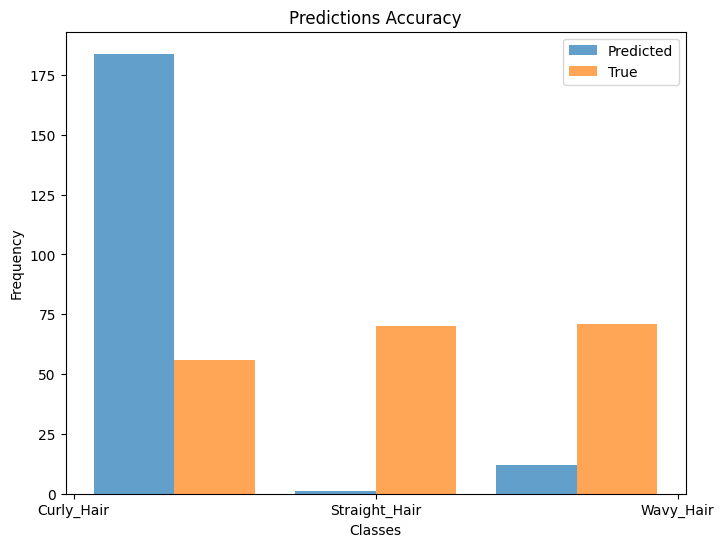

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf


# Load the trained CNN model
model = keras.models.load_model("modelExperiment13.keras")

# Create a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    seed=1337,
    image_size=(64, 64),
    batch_size=32,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
)

# Get class names
class_names = test_ds.class_names

# Make predictions
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a plot to visualize accuracy
plt.figure(figsize=(8, 6))
plt.hist(
    [predicted_labels, true_labels],
    bins=len(class_names),
    label=["Predicted", "True"],
    alpha=0.7,
)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(range(len(class_names)), class_names)
plt.title("Predictions Accuracy")
plt.legend()
plt.show()

Found 985 files belonging to 3 classes.
Using 197 files for validation.
1/1 [==============================] - 0s 152ms/step


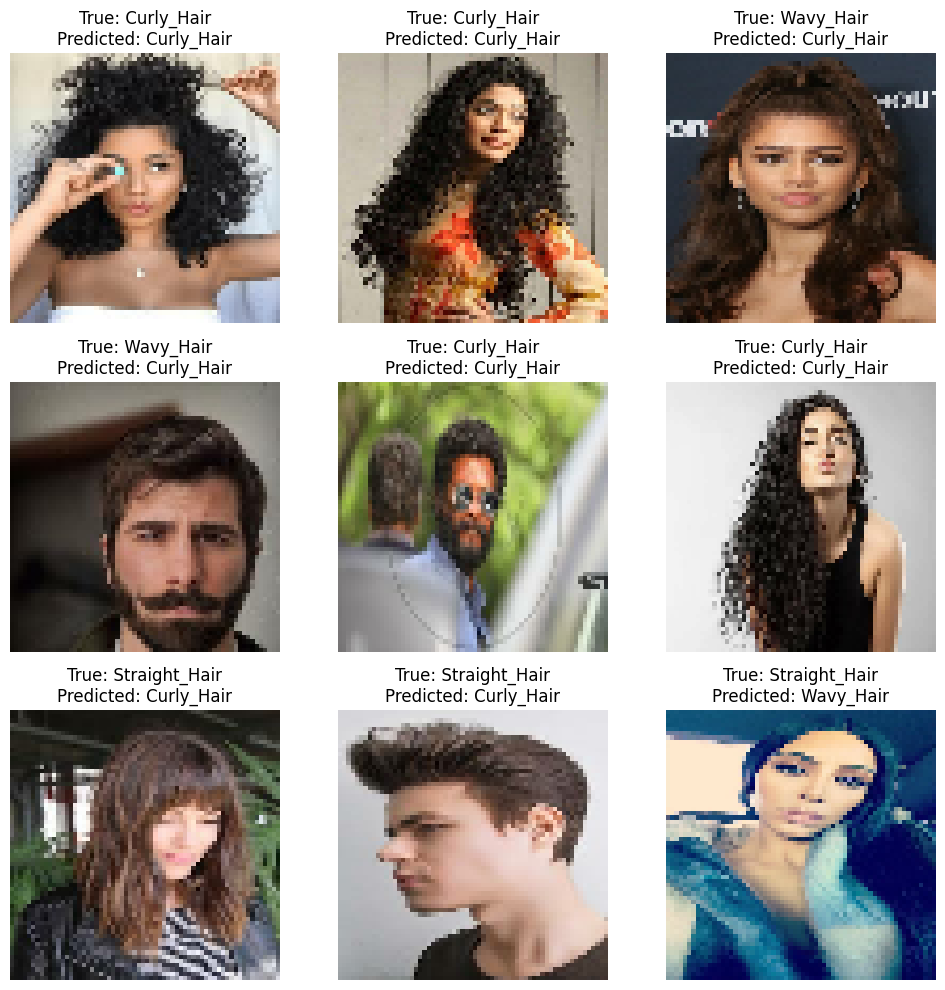

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf

# Load the pre-trained CNN model
model = keras.models.load_model("modelExperiment13.keras")

# Create a test dataset for validation
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    seed=1337,
    image_size=(64, 64),
    batch_size=9,  # Adjust batch size to display 3x3 grid
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
)

# Get the class names for better visualization
class_names = test_ds.class_names

# Extract a batch of images and corresponding labels
for images, labels in test_ds.take(1):  # Extract one batch
    predicted_labels = model.predict(images)  # Make predictions
    predicted_labels = np.argmax(
        predicted_labels, axis=1
    )  # Convert predicted labels to classes
    true_labels = np.argmax(labels, axis=1)  # Convert true labels to classes

    # Display the images with their true and predicted labels in a 3x3 grid
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(
            f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}"
        )
        plt.axis("off")
    plt.tight_layout()
    plt.show()